# Import Module

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing

## Load cifar10 dataset

In [2]:
cifar = datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

170500096/170498071 [==============================] - 6s 0us/step


## Define the class

In [3]:
num_classes = 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

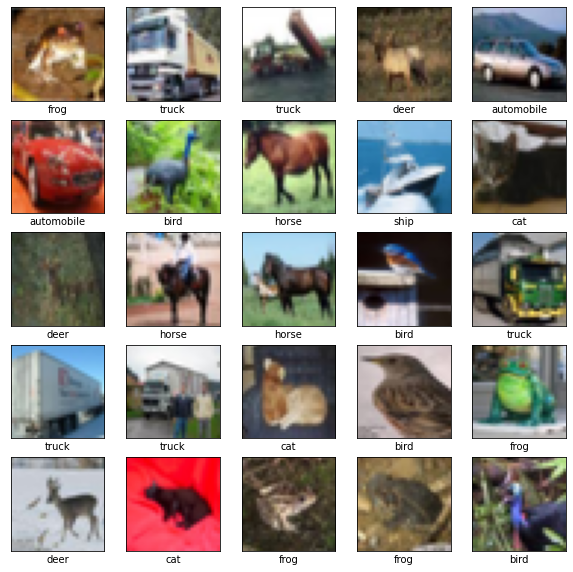

In [4]:
# View sample data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()

# Data Exploration

In [5]:
# Show data shape
train_images.shape

(50000, 32, 32, 3)

In [6]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
train_labels[0]

array([6], dtype=uint8)

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build the Model

## Define the Model

In [9]:
#Define the model
model = models.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate = 0.25))


model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                81930     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0

## Fiting Model

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5002 - accuracy: 0.4746
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2148 - accuracy: 0.5791
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1148 - accuracy: 0.6164
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0630 - accuracy: 0.6343
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0170 - accuracy: 0.6514
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9878 - accuracy: 0.6596
Epoch 7/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.9651 - accuracy: 0.6711
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9459 - accuracy: 0.6749
Epoch 9/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9266 - accuracy: 0.6813
Epoch 10/10
1563/1563 [==============================] - 35s 22m

## Testing Model

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 1.0382 - accuracy: 0.6447

Test accuracy: 0.6446999907493591


## Image Predict

In [15]:
predictions = model.predict(test_images)

In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[int(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, int(true_label[i])
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

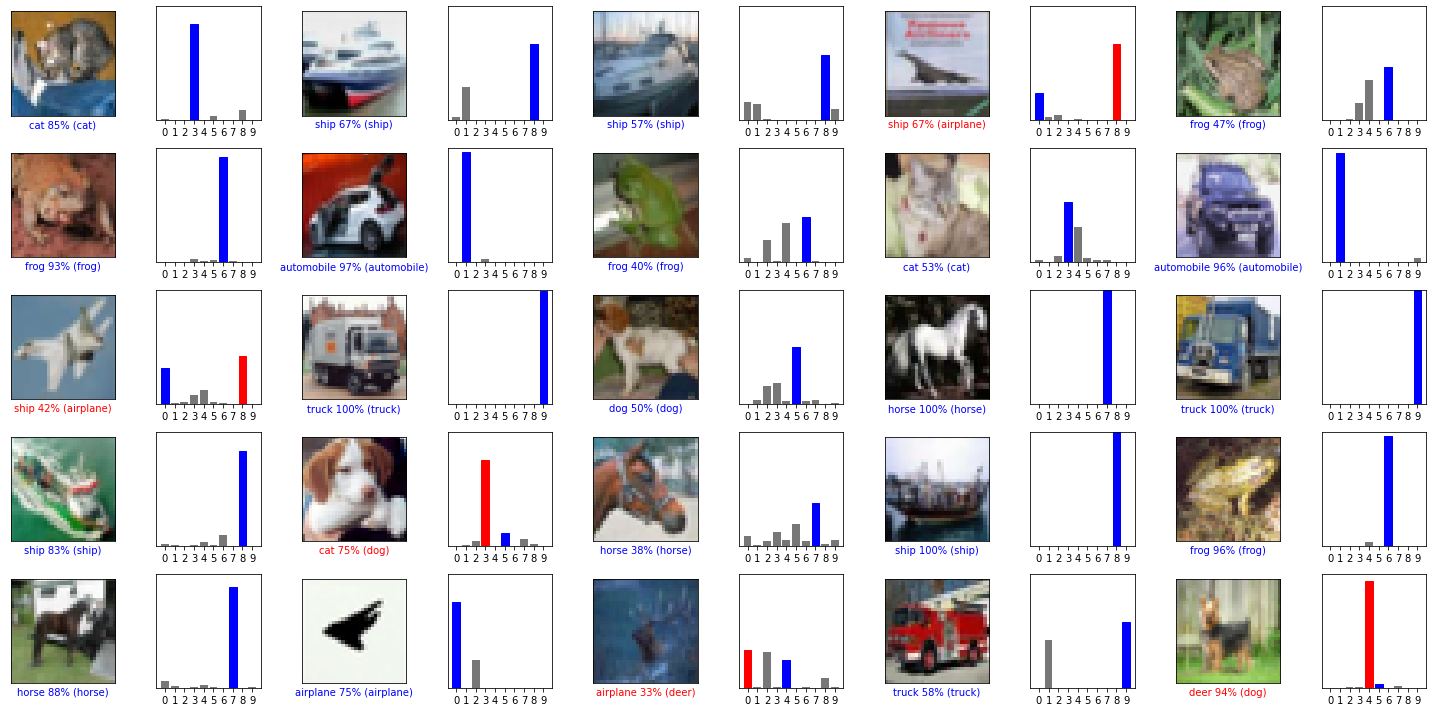

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Try your Own

## Latihan

In [18]:
!wget 'https://horse-canada.com/wp-content/uploads/2018/07/AppendexQuarterHorse.jpg'

--2020-12-03 01:46:29--  https://horse-canada.com/wp-content/uploads/2018/07/AppendexQuarterHorse.jpg
Resolving horse-canada.com (horse-canada.com)... 67.227.195.218
Connecting to horse-canada.com (horse-canada.com)|67.227.195.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 232335 (227K) [image/jpeg]
Saving to: ‘AppendexQuarterHorse.jpg’

AppendexQuarterHors 100%[===================>] 226.89K   730KB/s    in 0.3s    

2020-12-03 01:46:30 (730 KB/s) - ‘AppendexQuarterHorse.jpg’ saved [232335/232335]



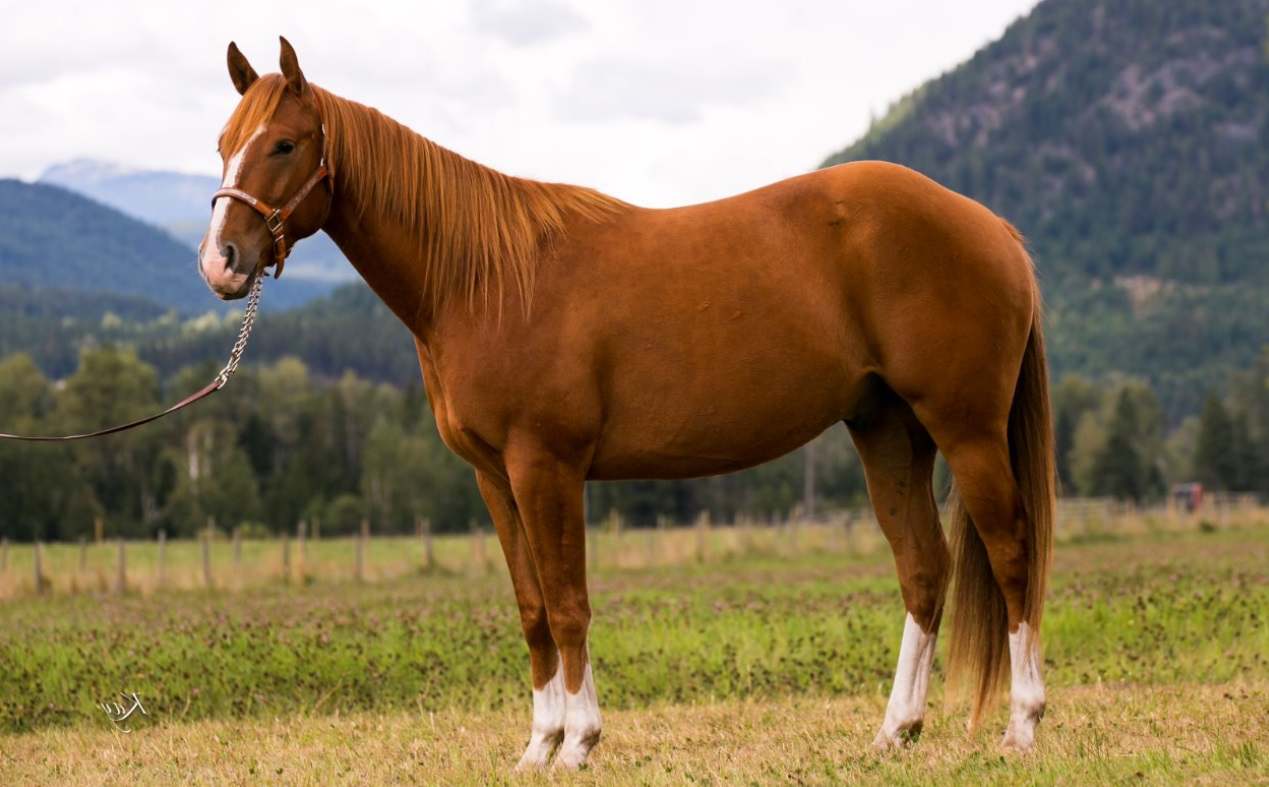

In [19]:
from PIL import Image, ImageOps

img = Image.open('/content/AppendexQuarterHorse.jpg')
img

In [20]:
def predict(img):
  new_width  = 32
  new_height = 32
  img = np.array(img.resize((new_width, new_height), Image.ANTIALIAS))
  img = img / 255
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.subplot(1,2,2)
  predictions_array = model.predict(img.reshape(1, 32, 32, 3))
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.show()
  return class_names[np.argmax(model.predict(img.reshape(1, 32, 32, 3)))]

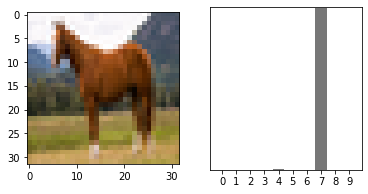

'horse'

In [21]:
predict(img)

## Tugas

In [44]:
# Import File
from google.colab import files
uploaded = files.upload()

Saving download (1).jpg to download (1) (1).jpg


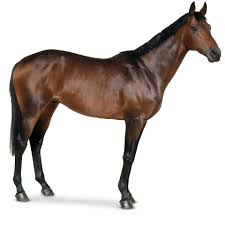

In [45]:
from PIL import Image, ImageOps

img = Image.open('download (1).jpg')
img

In [46]:
def predict(img):
  new_width  = 32
  new_height = 32
  img = np.array(img.resize((new_width, new_height), Image.ANTIALIAS))
  img = img / 255
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.subplot(1,2,2)
  predictions_array = model.predict(img.reshape(1, 32, 32, 3))
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.show()
  return class_names[np.argmax(model.predict(img.reshape(1, 32, 32, 3)))]

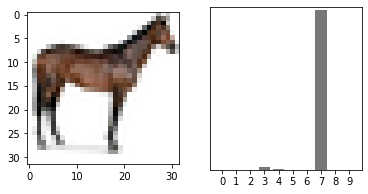

'horse'

In [47]:
predict(img)